# Abstract

This notebook presents a Convolutional Neural Network (CNN) model to classify the TMNIST dataset consisting of grayscale images of handwritten digits.

In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv


# Importing all the liabraries

In [70]:
#importing the liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [71]:
# Reading the data into pandas dataframe
dataset_url = "/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv"
df = pd.read_csv(dataset_url)

In [72]:
# Viewing the first 5 rows of the dataset
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
# Viewing the shape of the dataset
print("Shape of the Dataset:", df.shape)

Shape of the Dataset: (274093, 786)


In [74]:
# Viewing the samples of the dataset
print("Number of Samples : ", df.shape[0])

Number of Samples :  274093


In [75]:
# Viewing the features of the dataset
print("Number of Features : ", df.shape[1])

Number of Features :  786


In [76]:
total_unique_chars = len(df.labels.unique())
print("Number of unique character in the Dataset : ", total_unique_chars)

Number of unique character in the Dataset :  94


In [77]:
unique_chars = df['labels'].unique().tolist()
print("All the unique characters in the Dataset are : \n", unique_chars)

All the unique characters in the Dataset are : 
 ['6', 'D', 'f', '/', 'F', 'x', 'J', '8', 'H', 'k', '@', '1', '=', 'g', ')', '2', 'd', '^', '3', 't', '#', '.', '4', 'o', '"', 'y', 'A', 'u', 'G', '-', 'm', 'W', '&', 'c', '9', 'N', ']', 'P', 'X', '|', '}', 'h', '7', 'j', '5', '>', '?', 'b', '*', 'w', 'l', '0', '$', 'I', 'Y', '%', ':', 'T', 'K', 'E', '<', 'V', '{', 'M', 'S', 'a', 'i', 'r', "'", 'p', ';', '[', '+', 'e', 'U', '(', 's', '~', ',', 'C', 'q', '_', 'n', 'B', 'z', 'v', 'O', 'R', '`', 'Z', 'Q', 'L', '!', '\\']


In [78]:
# Defining X and y for the dataset
X = df.drop(columns={'names','labels'})
y = df[['labels']]

# Showing samples from the dataset

The TMNIST dataset consists of 28x28 grayscale images. The goal is to train a neural network model on a subset of the dataset (training set) and then use the model to predict the digit class of images in a separate subset of the dataset (test set).

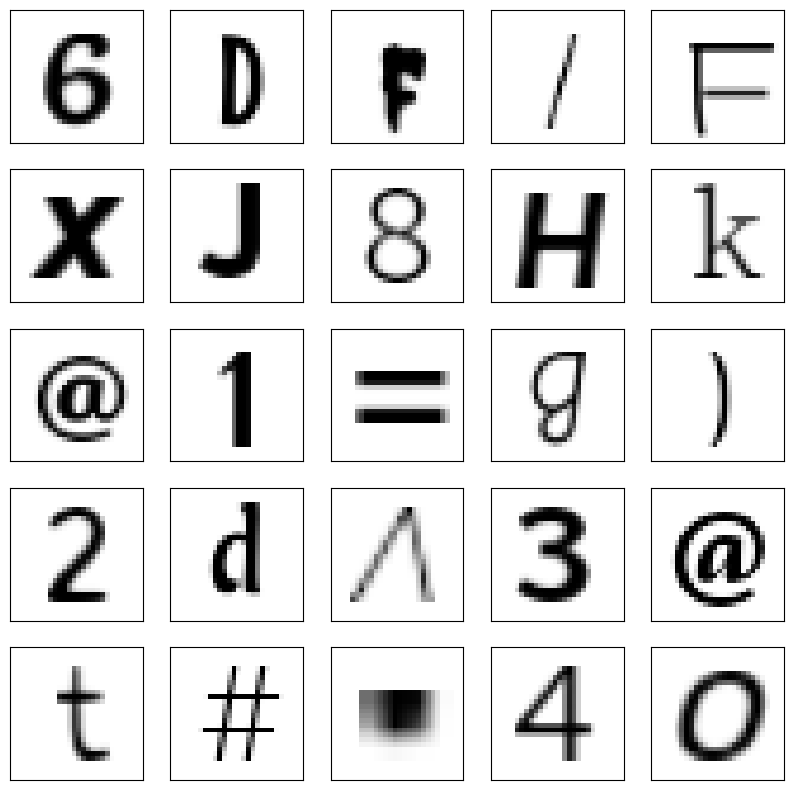

In [79]:
X_images = X.values.reshape(-1, 28, 28)

# Create a 5x5 grid of subplots
fig, axs = plt.subplots(5, 5, figsize=(10, 10))

# applying Loop through the subplots and display the images
for i in range(25):
    r = i // 5  # Row index
    c = i % 5   # Column index

    axs[r][c].set_xticks([])
    axs[r][c].set_yticks([])
    axs[r][c].imshow(X_images[i], cmap='Greys')

# Displaying the plot
plt.show()

In [80]:
#Splitting the dataset into training and testing sets, with an 80-20 split
# test_size=0.2 means 20% of the data is used for testing and 80% for training
# random_state is a random seed used for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



y_train = y_train.values.reshape((-1,))
y_test = y_test.values.reshape((-1,))

In [81]:
print('X:Train, Test data shape: {}, {}'.format(X_train.shape, X_test.shape))
print('Y:Train, Test data shape: {}, {}'.format(y_train.shape, y_test.shape))

X:Train, Test data shape: (219274, 784), (54819, 784)
Y:Train, Test data shape: (219274,), (54819,)


In [82]:
#Normalize the dataset to values between 0 and 1
X_train= (X_train.astype('float32'))/255.0
X_test = (X_test.astype('float32'))/255.0

# Pre-processing the Dataset: 
In order to increase the quality of the data, it is necessary to process, clean, and correct it. A dataset that is scaled, all-numerical, and devoid of null values is the optimal kind of dataset for CNN to learn from. So, we will take certain actions in this section to make sure that our dataset is ideal for a CNN model to learn from. We will only work with the training dataset from this point on until we develop the CNN model.

Converting character lables to numbers since Neural Network works on numeric values.

One-hot encoding is a technique used to convert categorical data into numerical data that can be used for machine learning models. In this technique, each categorical value is converted into a binary vector, where only one bit is 'hot' (1), while the rest are 'cold' (0). The length of the vector is equal to the number of unique categorical values in the dataset
One-hot encoding is often used in machine learning models, such as neural networks and decision trees, as these models generally require numerical data as input. It is important to note that one-hot encoding can result in high-dimensional sparse data, where many of the values are zero. However, this can be efficiently handled by modern computing systems.

In [83]:
#Converting character lables to numbers since Neural Network works only on numeric values
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train_encoded = enc.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = enc.transform(y_test.reshape(-1, 1))

In [84]:
#Reshaping the input data
X_train_norm=X_train.values.reshape(X_train.shape[0],28,28, 1)
X_test_norm=X_test.values.reshape(X_test.shape[0],28,28, 1)

In [85]:
num_classes=df['labels'].nunique()
num_font=df['names'].nunique()

# CNN
A Convolutional Neural Network (CNN) is a type of neural network that is commonly used in image and video recognition tasks. The key feature of CNNs is the use of convolutional layers that apply a set of filters to the input image to extract useful features. These filters can detect edges, shapes, patterns, and other features that are important for the recognition task.

The typical architecture of a CNN consists of multiple convolutional layers followed by pooling layers that reduce the spatial dimensionality of the feature maps. The output of the last convolutional layer is then flattened and passed through one or more fully connected layers that perform the final classification.

In training a CNN model, the weights of the filters in the convolutional layers are learned through backpropagation of errors. The network is fed with labeled training data and the weights are adjusted to minimize the error between the predicted output and the actual output.

CNNs have been successful in a wide range of image and video recognition tasks, including object detection, image segmentation, and facial recognition. They are also widely used in natural language processing tasks such as sentiment analysis and text classification, by applying the convolution operation to the word embeddings of the input text.

# CNN Model Architecture

- The first layer is a Conv2D layer with 64 filters and a kernel size of 5x5. The activation function used is ReLU(Rectified Linear Unit). The input shape is set to (28, 28, 1), indicating the input image dimensions (height, width, channels). This is typical for grayscale images.

- The second layer is a MaxPooling2D layer with a pool size of 2x2. This layer reduces the dimensions of the input by taking the maximum value within each 2x2 block of the input.

- The third layer is a Flatten layer, which takes the output of the previous layer and flattens it into a 1D array.

- Then there are 4 fully connected (dense) layers.
- The first dense layer has 128 neurons with ReLU activation.
- The second dense layer has 64 neurons with ReLU activation.
- The third and fourth dense layers have 32 neurons each with ReLU activation.
- The eighth and final layer is the output layer with the number of units equal to the number of classes in the classification problem. The activation function used is softmax, which outputs a probability distribution over the classes.
- Finally, the model is compiled with the Adam optimizer, categorical crossentropy loss function (since it is a multi-class classification problem), and accuracy as the evaluation metric.

In [86]:
#Defining the model
from tensorflow.keras.optimizers import Adam
model = Sequential()

model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(28, 28,1)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_15 (Dense)            (None, 128)               1179776   
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                      

The batch size is 128 and number of epochs is 20

In [87]:
#Fitting the basic model
model_history = model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2, batch_size=128)

Epoch 1/20
1714/1714 - 72s - loss: 0.8255 - accuracy: 0.7814 - val_loss: 0.4147 - val_accuracy: 0.8760 - 72s/epoch - 42ms/step
Epoch 2/20
1714/1714 - 67s - loss: 0.3551 - accuracy: 0.8941 - val_loss: 0.3123 - val_accuracy: 0.9059 - 67s/epoch - 39ms/step
Epoch 3/20
1714/1714 - 66s - loss: 0.2831 - accuracy: 0.9135 - val_loss: 0.2965 - val_accuracy: 0.9113 - 66s/epoch - 38ms/step
Epoch 4/20
1714/1714 - 66s - loss: 0.2453 - accuracy: 0.9226 - val_loss: 0.2722 - val_accuracy: 0.9188 - 66s/epoch - 38ms/step
Epoch 5/20
1714/1714 - 66s - loss: 0.2186 - accuracy: 0.9307 - val_loss: 0.2620 - val_accuracy: 0.9174 - 66s/epoch - 39ms/step
Epoch 6/20
1714/1714 - 67s - loss: 0.1977 - accuracy: 0.9354 - val_loss: 0.2389 - val_accuracy: 0.9271 - 67s/epoch - 39ms/step
Epoch 7/20
1714/1714 - 66s - loss: 0.1813 - accuracy: 0.9397 - val_loss: 0.2423 - val_accuracy: 0.9252 - 66s/epoch - 39ms/step
Epoch 8/20
1714/1714 - 66s - loss: 0.1659 - accuracy: 0.9442 - val_loss: 0.2492 - val_accuracy: 0.9258 - 66s/ep

# Evaluating the model

In [88]:
#Evaluating the accuracy of the model on the test data
score = model.evaluate(X_test_norm, y_test_encoded, batch_size = 128,verbose = 0)
print("Test Accuracy : ", round(score[1],4)*100, "%")

Test Accuracy :  92.89 %


# Visualizing the model performance

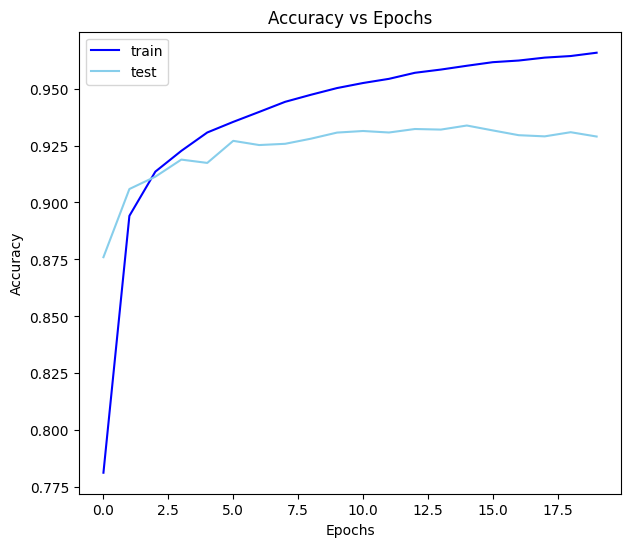

In [89]:
epochs = np.arange(20)

# Plotting accuracy vs epochs
fig, ax_accuracy = plt.subplots(figsize=(7, 6))
ax_accuracy.set_title('Accuracy vs Epochs')
ax_accuracy.plot(epochs, model_history.history['accuracy'], color='blue', label='train')
ax_accuracy.plot(epochs, model_history.history['val_accuracy'], color='skyblue', label='test')
ax_accuracy.set_xlabel('Epochs')
ax_accuracy.set_ylabel('Accuracy')
ax_accuracy.legend()
plt.show()

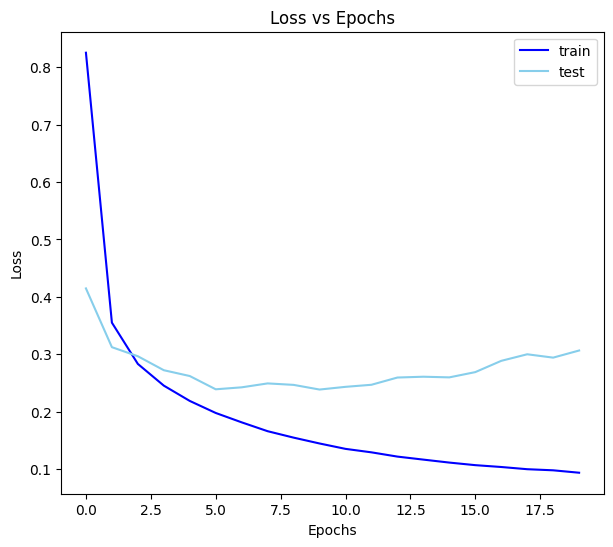

In [90]:
# Plotting loss vs epochs
fig, ax_loss = plt.subplots(figsize=(7, 6))
ax_loss.set_title('Loss vs Epochs')
ax_loss.plot(epochs, model_history.history['loss'], color='blue', label='train')
ax_loss.plot(epochs, model_history.history['val_loss'], color='skyblue', label='test')
ax_loss.set_xlabel('Epochs')
ax_loss.set_ylabel('Loss')
ax_loss.legend()
plt.show()

# Conclusion
In conclusion, the process of building and training a CNN for recognizing handwritten characters from the TMNIST dataset is a well-defined and structured process. By following the steps of data preparation, CNN architecture building, training, evaluation, and visualization, we can create a highly accurate and reliable model for character recognition. 

# References

https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy

https://keras.io/examples/vision/mnist_convnet/

https://medium.com/@BrendanArtley/mnist-keras-simple-cnn-99-6-731b624aee7f

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/


Copyright (c) 2023 Snehal Kisan Padekar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.